# Description of Pima Diabetes Dataset

Diabetes mellitus is a group of metabolic disorders characterized by abnormally high levels of blood glucose secondary to inefficient insulin action and/or secretion. The disease often leads to significant disability, including renal failure, blindness, and limb amputation, and to premature death. Diabetes occuring in Native Americans is almost exclusively the type referred to as NIDDM (Non-insulin-dependent-Diabetes Mellitus). The Pima indians have the highest recorded prevalence and incidence of NIDDM in the world.

The given dataset contains the following columns : 
    1. 'Pregnancies' = Number of times pregnent
    2. 'Glucose' = Plasma Glucose concentration (a 2 hours in an oral glucose tolerance test)
    3. 'BloodPressure' = Diastolic blood pressure (mm.Hg)
    4. 'SkinThickness' = Tricep's skin fold thickness
    5. 'Insulin' = 2 hour serum insulin (mu U/ml)
    6. 'BMI' = Body mass index (weight in Kg/(square of height))
    7. 'DiabetesPedigreeFunction'
    8. 'Age' = in years
    9. 'Outcome' = Class Variable 0 or 1, where 1 means Diabetic patient and 0 means not.

Steps followed for this project work : 
    1. Load  the dataset.
    2. Understand the structure of dataset.
    3. Plot various graphs to explore the dataset.
    4. Use descriptive statistics elements to describe the dataset.
    5. Find relationship between various attributes.
    6. State your insights from the dataset.

In [2]:
#Import the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

## Load  the dataset

In [3]:
#Getting the Data from the .csv file
db=pd.read_csv('diabetes.csv')

In [4]:
#Checking first 6 rows
db.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [5]:
#Checking last 6 rows
db.tail(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Understand the structure of dataset

In [6]:
# understand shape and size of dataset
print(db.shape)
print (db.size)

(768, 9)
6912


In [7]:
#get more information about dataset
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Checking the null values, and if there is null value present then drop those columns
val=db.isnull().values.any()

if val==True:
    print("Missing/NaN values present", db.isnull().values.sum())
    db=db.dropna()
else:
    print("No missing/NaN values")

No missing/NaN values


Hence the dataset does not contain any Missing/NaN values. Hence observing the basic statistical informations coming from the dataset.

In [9]:
# Mean of the DataFrame
db.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [10]:
# standard deviation
db.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [11]:
# Median
db.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [12]:
# Mode
db.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


## Plot various graphs to explore the dataset

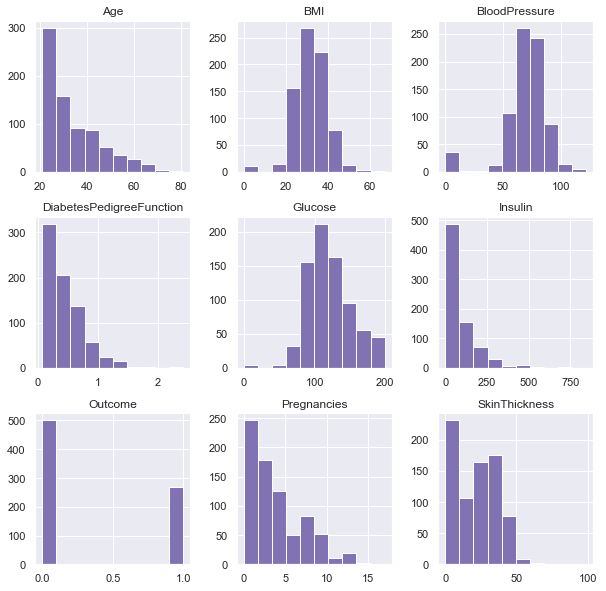

In [13]:
# plot histogram

db.hist(figsize=(10,10),color="m",grid=True)
plt.show()

I have used different color codes to change the visibility, but still some of the columns have higher number of 0 values (which is impossible for biological datasets). Further investigating with pairplot.

## Use descriptive statistics elements to describe the dataset

<Figure size 1440x720 with 0 Axes>

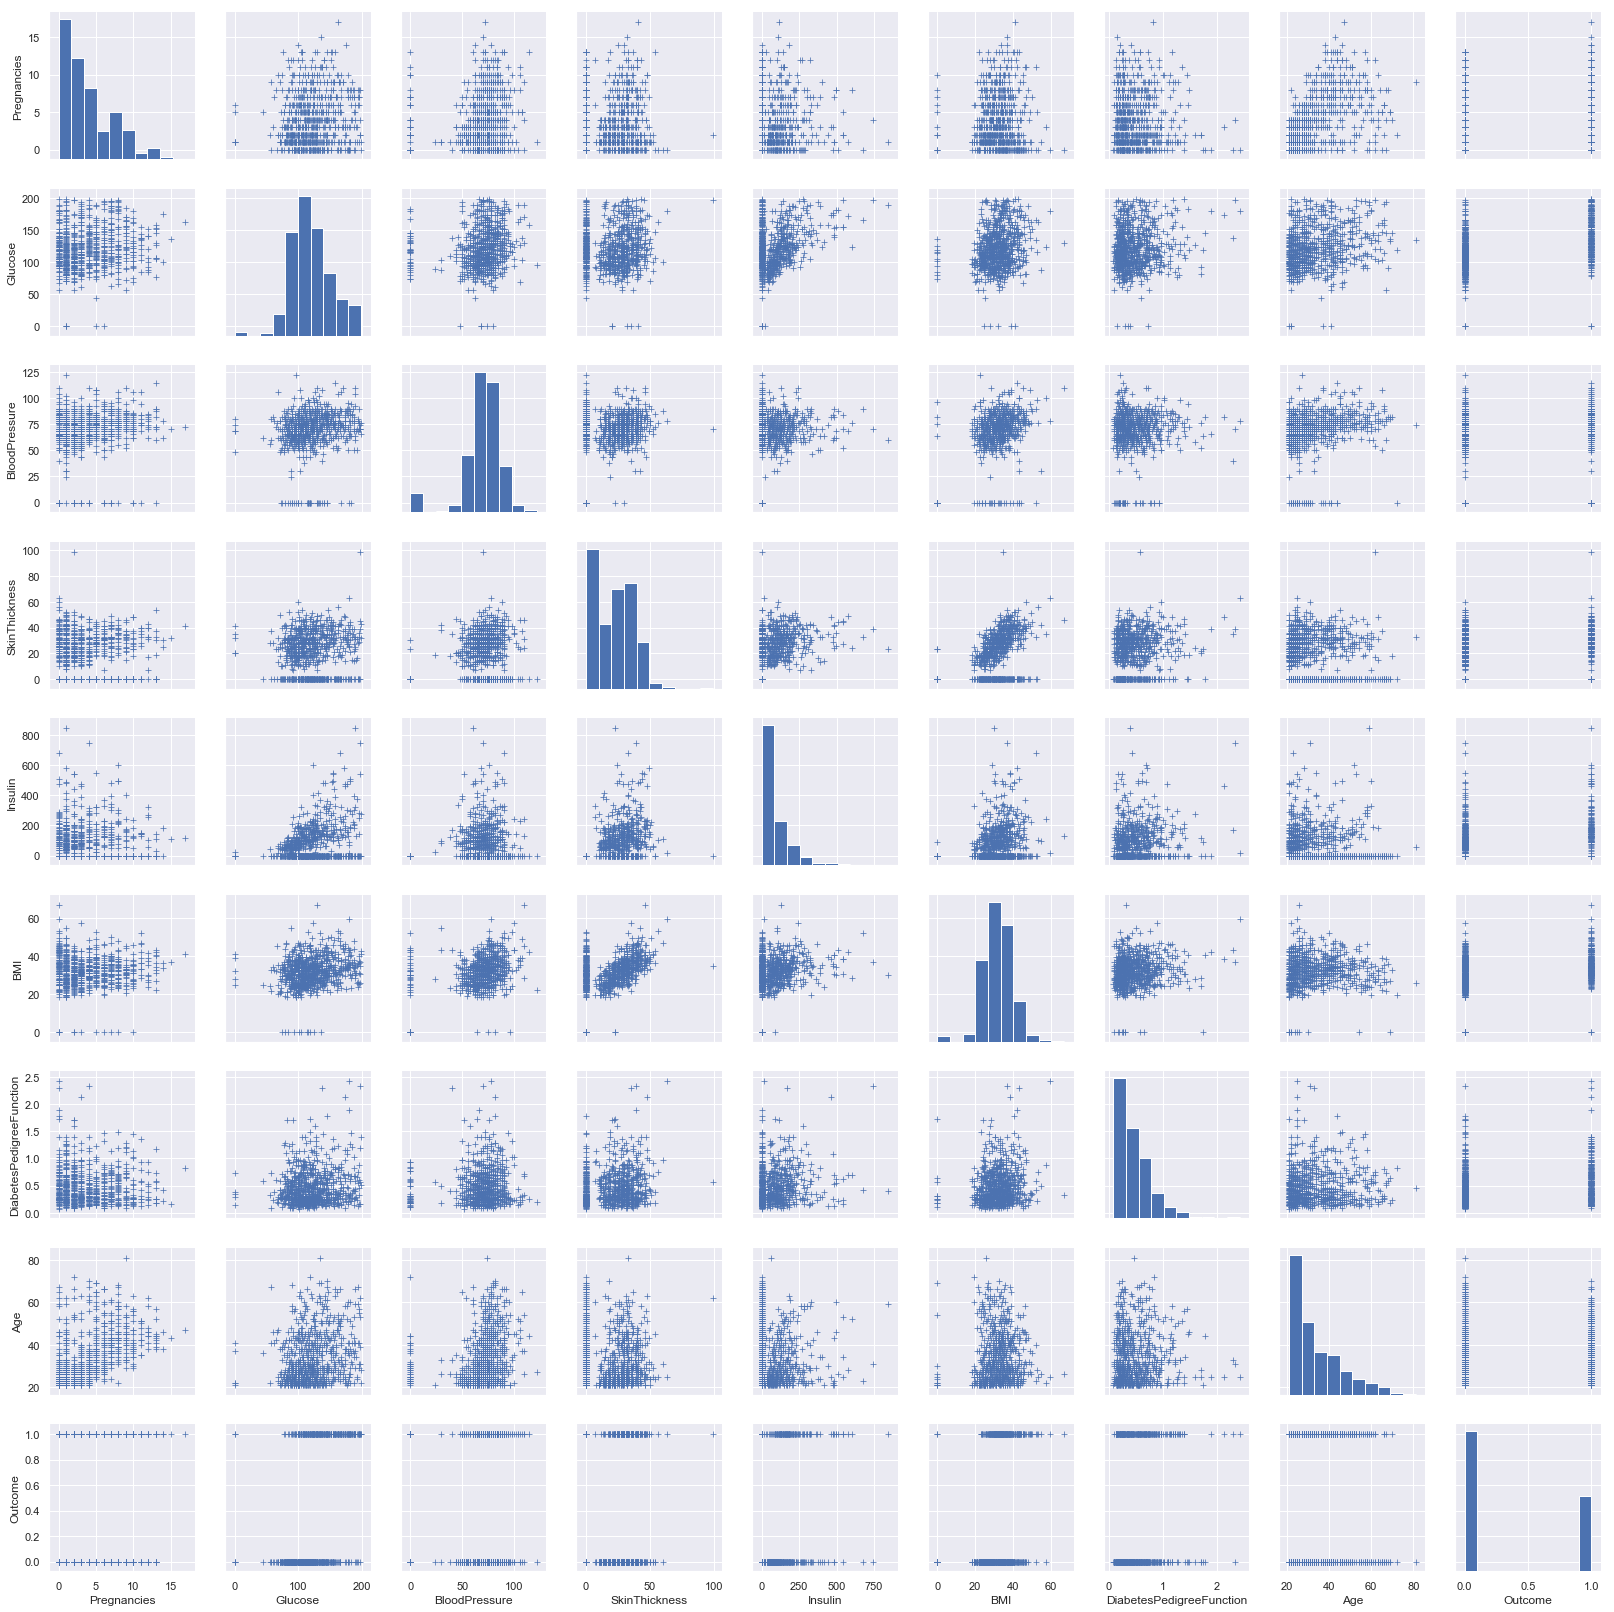

<Figure size 1440x720 with 0 Axes>

In [14]:
# pair plot
sns.pairplot(db,markers="+")
plt.figure(figsize=(20,10))

Hence, we have 0 as a value for the columns Glucose, BMI, Blood Pressure, skin thickness. These are impacting the overall data. 
Need to replace those 0 with the mean value.Otherwise we can go ahead with the values the columns Pregnencies,Insulin, DiabetesPedigreeFunction and outcome as it is.

In [23]:
#Checking the corelation coefficient
cor=db.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,-0.073535,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.331080,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,-0.046829,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.112974,0.542398,0.100966,0.127872,0.215299
Insulin,-0.073535,0.331080,-0.046829,0.112974,1.000000,0.184768,0.185071,-0.042163,0.130548
BMI,0.021565,0.230941,0.281268,0.542398,0.184768,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.185071,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,-0.042163,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.130548,0.311924,0.173844,0.238356,1.000000


## Find relationship between various attributes

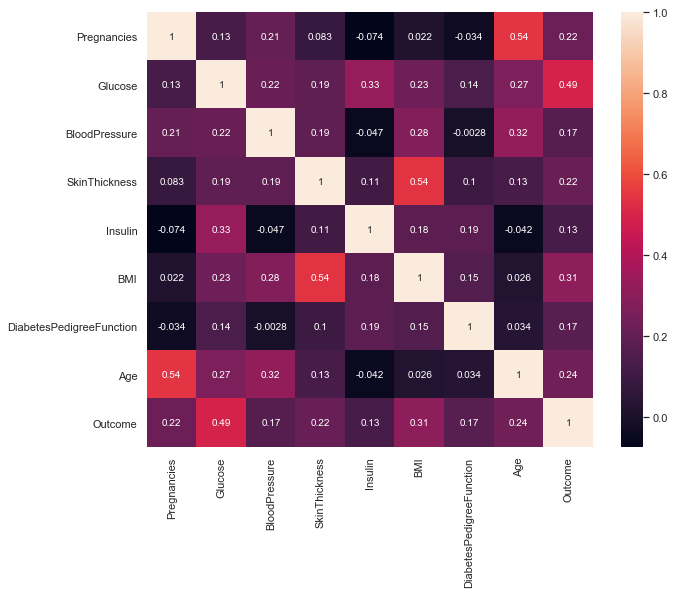

In [26]:
#Plotting the Heatmap with the variables
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

From the above heatmap, we can takeaway the following features : (the darker the box, less the corelation between them)
    1. Pregnancies and Insulin has the least (negative) corelation of -0.074
    2. Highest (positive) corelation is between Age and Pregnancy of 0.54

In [27]:
db1=db[db.Glucose !=0]
db2=db[db.BMI !=0]
db3=db[db.BloodPressure !=0]
db4=db[db.SkinThickness !=0]
db5=db[db.Outcome !=0]

There are several methods to reduce/remove outliers for a particular dataset. In our case it is 0. For logical outlier removal we can replace the zero values with the mean of the nonzero rows. (Better approach would be to remove the outliers depending on the value of other specific column/columns )

In [28]:
db1['Glucose'].mean()

121.68676277850587

In [29]:
db2['BMI'].mean()

32.457463672391

In [30]:
db3['BloodPressure'].mean()

72.40518417462486

In [31]:
db4['SkinThickness'].mean()

29.153419593345607

In [32]:
#Replacing the 0 values for the mentioned columns with mean value of that columns
db['Glucose'].replace([0],[db1['Glucose'].mean()],inplace=True)
db['BMI'].replace([0],[db2['BMI'].mean()],inplace=True)
db['BloodPressure'].replace([0],[db3['BloodPressure'].mean()],inplace=True)
db['SkinThickness'].replace([0],[db4['SkinThickness'].mean()],inplace=True)

## Looking into the data with greater Details

### Pregnancies vs Outcome

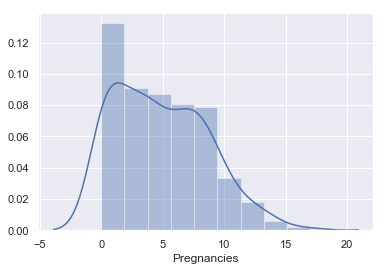

In [35]:
sns.distplot(db5['Pregnancies'])

The graph is right skewed, hence square root, cube root or log function can be used to reduce the skewness, and converting the graph to a normalized curve.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EC69B00>,
      dtype=object)

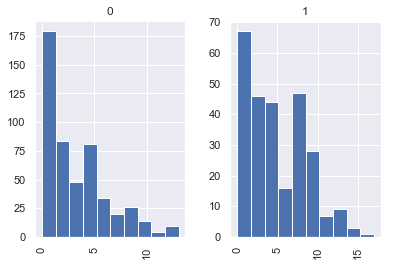

In [22]:
# Visualizing values based on Diabetes
db.hist(by='Outcome',column='Pregnancies')

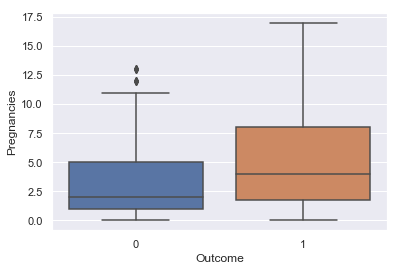

In [33]:
# boxplot
sns.boxplot(x="Outcome",y="Pregnancies", data=db)

Hence, it is evident from the graphs that the diabetic patients have a greater number of pregnencies. Though the relation is not very evident.

### Glucose vs Outcome

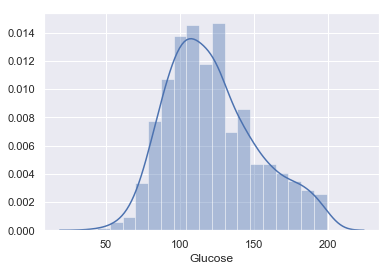

In [39]:
sns.distplot(db['Glucose'])

The graph is more or less normalised. (a little right skewed)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C5192B0>,
      dtype=object)

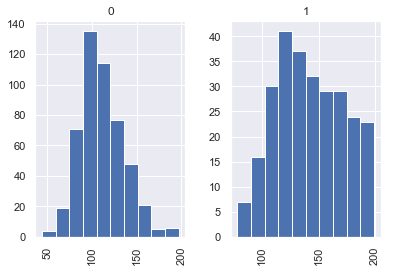

In [37]:
db.hist(by='Outcome',column='Glucose')

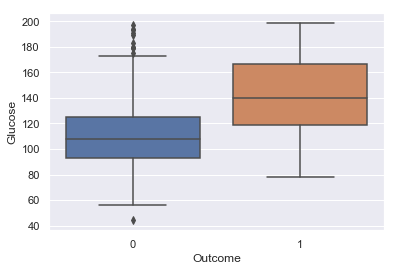

In [38]:
# boxplot
sns.boxplot(x="Outcome",y="Glucose", data=db)

From the above graph it is evident that the females having diabetes have significantly high blood glucose. (Some Non-Diabetic patients though have high blood sugar). It has a strong relation with the outcome.

### BloodPressure vs Outcome

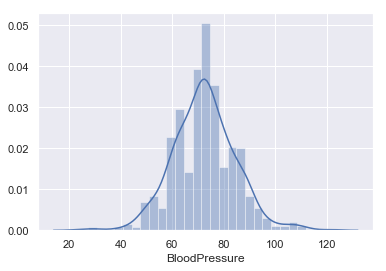

In [41]:
sns.distplot(db['BloodPressure'])

The above graph is significantly normalised.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000096A5048>,
      dtype=object)

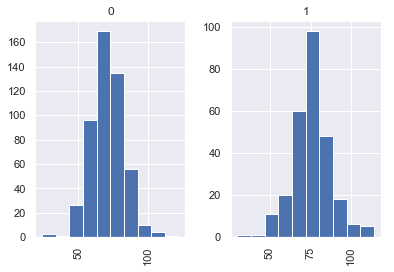

In [42]:
db.hist(by='Outcome',column='BloodPressure')

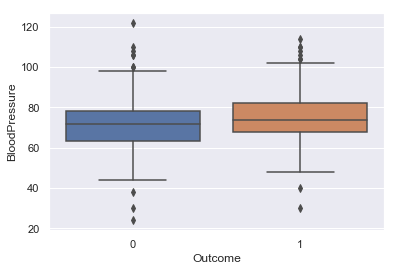

In [43]:
# boxplot
sns.boxplot(x="Outcome",y="BloodPressure", data=db)

From the graphs we can say that the diabetic patients have a little greater blood-pressure. Though the relation is very feeble.

### SkinThickness Vs Outcome

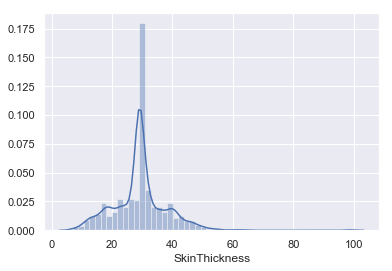

In [45]:
sns.distplot(db['SkinThickness'])

Previously this data has a greater number of 0 values which we have replaced with the mean, due to which the peak can be shown in the middle. If we have omitted those values, then the graph should be a little right skewed.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C2CB0B8>,
      dtype=object)

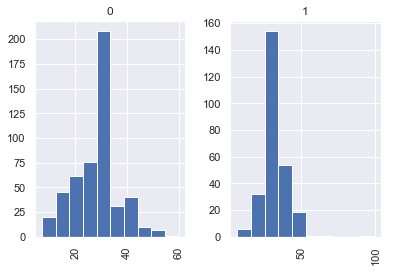

In [46]:
db.hist(by='Outcome',column='SkinThickness')

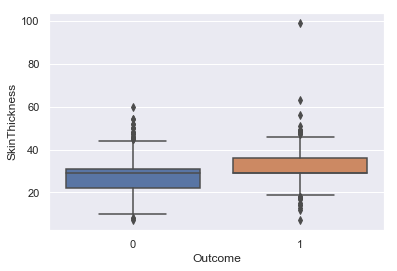

In [47]:
# boxplot
sns.boxplot(x="Outcome",y="SkinThickness", data=db)

The above plot has numerous outliers, where the diabetic patients show a little thick Tricep skin. Even though the relation is very weak.

### Insulin Vs Outcome

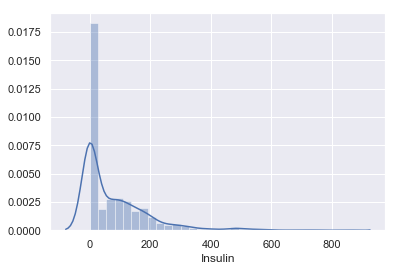

In [48]:
sns.distplot(db['Insulin'])

The plot is somewhat faulty having a heavy 0 values, making it highly right skewed.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C8A71D0>,
      dtype=object)

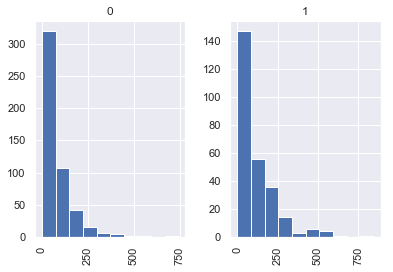

In [49]:
db.hist(by='Outcome',column='Insulin')

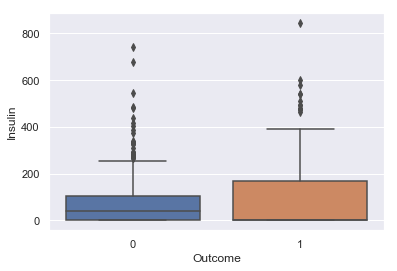

In [50]:
# boxplot
sns.boxplot(x="Outcome",y="Insulin", data=db)

Due to keeping the 0 values in the insulin column, the outcome becomes loosely dependent on it. But still lesser insulin in a way leads to outocme as 1.

### BMI Vs Outcome

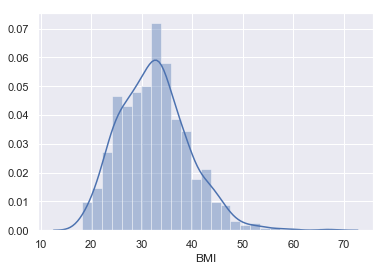

In [51]:
sns.distplot(db['BMI'])

Normalised though, but contains some outliers. (Otherwise right skewed)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B6CEF28>,
      dtype=object)

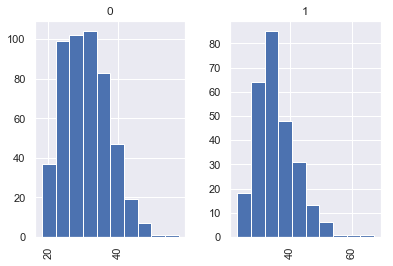

In [52]:
db.hist(by='Outcome',column='BMI')

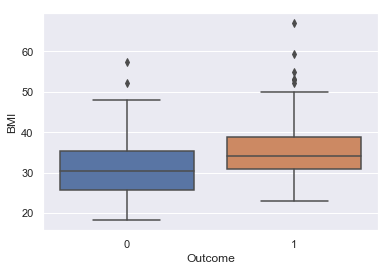

In [53]:
# boxplot
sns.boxplot(x="Outcome",y="BMI", data=db)

As per the above data, Diabetic patients have greater BMI in comparison to non-diabetic. (Strong relation)

### DiabetesPedigreeFunction Vs Outcome

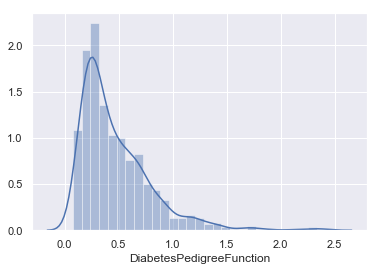

In [54]:
sns.distplot(db['DiabetesPedigreeFunction'])

Significantly right skewed, square-root, cube-root or logarithmic functions should be used to normalise the curve.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C268E48>,
      dtype=object)

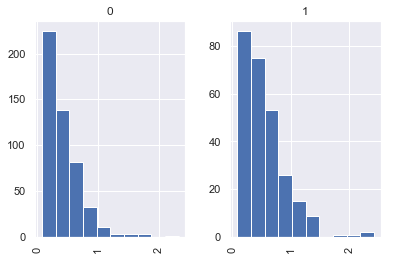

In [55]:
db.hist(by='Outcome',column='DiabetesPedigreeFunction')

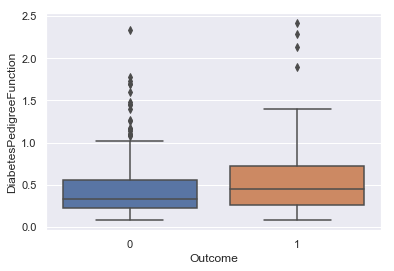

In [56]:
# boxplot
sns.boxplot(x="Outcome",y="DiabetesPedigreeFunction", data=db)

The above plot contains numerous outliers. Otherwise the diabetic patients have higher DiabetesPedigreeFunction as compared to non-Diabetic. (weakly related)

### Age Vs Outcome

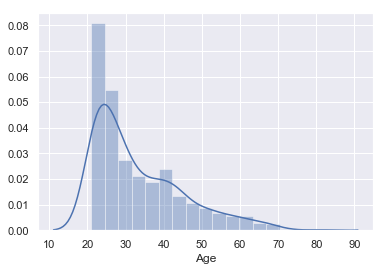

In [57]:
sns.distplot(db['Age'])

The graph is right skewed. Hence the most females were of young ages, who took participated in the experiment.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C2CED30>,
      dtype=object)

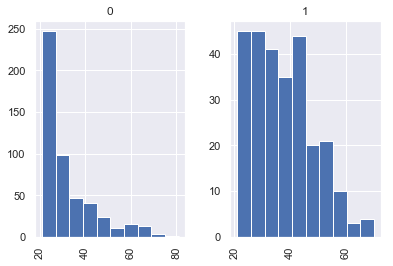

In [58]:
db.hist(by='Outcome',column='Age')

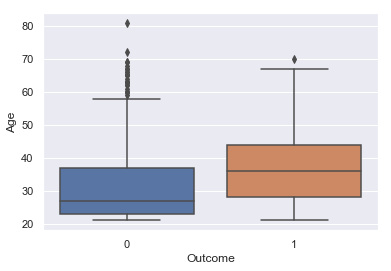

In [59]:
# boxplot
sns.boxplot(x="Outcome",y="Age", data=db)

The dependency on Age is quite strong, and aged females are more prone to having diabetes.

## Reasons behind NIDDM (As per medical Experimental Reports)

There may be various reasons behind this. Some are explained below : 
    1. There may be a genetic susceptibility to diabetes ,
    2. The risk of diabetes occuring at an early age is strongly transmitted from parent to offspring, but diabetes occuring at an older age in parents has less effect on the risk of diabetes in offspring,
    3. For Pima tribe diabetes is remarkably frequent at younger ages and other tribes,
    4. Obesity in Pima actually aids in having diabetes, (hence BMI high means greater risk of diabetes)
    5. Diet has a direct impact with diabetes, a high fat diet may be related to the development of this disease,
    6. There is evidence that increased physical activity may have a protective effect on the development of NIDDM,
    7. Since a large proportion of subjects with NIDDM remain undiagnosed and might benefit from this data, (by early detectio and taking early precautions)
    8. Blood Glucose control is also very important for these kind of patients.